In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extração

In [2]:
df = pd.read_csv("bases/olist_order_items_dataset.csv").drop_duplicates('order_id')
pedidos = pd.read_csv("bases/olist_orders_dataset.csv")
pedidos_clone=pedidos[pedidos['order_status'] == 'delivered']
df = df.merge(pedidos_clone, on="order_id", how="inner")
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [3]:
pedidos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# Transformação

In [4]:
colunas = ["order_id", "shipping_limit_date"]
orders_df = pd.DataFrame(df, columns=colunas)
orders_df.head()

,order_id,shipping_limit_date
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-19 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,2017-05-03 11:05:13
2,000229ec398224ef6ca0657da4fc703e,2018-01-18 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,2018-08-15 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-13 13:57:51


In [5]:
orders_df.describe()

,order_id,shipping_limit_date
count,96478,96478
unique,96478,91029
top,00010242fe8c5a6d1ba2dd792cb16214,2018-06-11 03:31:04
freq,1,6


In [6]:
for i in orders_df.columns[0:2].tolist():
    print(i, ':', len(orders_df[i].astype(str).value_counts()))

order_id : 96478
shipping_limit_date : 91029


In [7]:
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.utf-8')

orders_df['shipping_limit_date'] = pd.to_datetime(orders_df['shipping_limit_date'])
orders_df['DIA'] = pd.DatetimeIndex(orders_df['shipping_limit_date']).day
orders_df['MÊS'] = pd.DatetimeIndex(orders_df['shipping_limit_date']).month
orders_df['ANO'] = pd.DatetimeIndex(orders_df['shipping_limit_date']).year
orders_df['MÊS'] = pd.DatetimeIndex(orders_df['shipping_limit_date']).month_name(locale = 'pt_BR.utf-8')

In [8]:
orders_df.head(10)

,order_id,shipping_limit_date,DIA,MÊS,ANO
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-19 09:45:35,19,Setembro,2017
1,00018f77f2f0320c557190d7a144bdd3,2017-05-03 11:05:13,3,Maio,2017
2,000229ec398224ef6ca0657da4fc703e,2018-01-18 14:48:30,18,Janeiro,2018
3,00024acbcdf0a6daa1e931b038114c75,2018-08-15 10:10:18,15,Agosto,2018
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-13 13:57:51,13,Fevereiro,2017
5,00048cc3ae777c65dbb7d2a0634bc1ea,2017-05-23 03:55:27,23,Maio,2017
6,00054e8431b9d7675808bcb819fb4a32,2017-12-14 12:10:31,14,Dezembro,2017
7,000576fe39319847cbb9d288c5617fa6,2018-07-10 12:30:45,10,Julho,2018
8,0005a1a1728c9d785b8e2b08b904576c,2018-03-26 18:31:29,26,Março,2018
9,0005f50442cb953dcd1d21e1fb923495,2018-07-06 14:10:56,6,Julho,2018


In [9]:
orders_df.groupby(['ANO']).size()

ANO
2016      267
2017    42456
2018    53754
2020        1
dtype: int64

# Carregamento

# ANO DE 2020

In [10]:
orders_df2 = orders_df.sort_values(by=["MÊS", "ANO"])
orders_2020 = orders_df2[orders_df2["ANO"] == 2020]


orders_2020_count = orders_2020.groupby(["ANO", "MÊS"]).size().reset_index(name="CONTAGEM")

meses_ordem = [
    "Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
    "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"
]
orders_2020_count["MÊS"] = pd.Categorical(
    orders_2020_count["MÊS"], 
    categories=meses_ordem, 
    ordered=True
)
orders_2020_count_sorted = orders_2020_count.sort_values(by="ANO", ascending=False)


orders_2020_count_sorted.head(48)

,ANO,MÊS,CONTAGEM
0,2020,Abril,1


C:\Users\willi.WILL\AppData\Local\Temp\ipykernel_7880\359582891.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


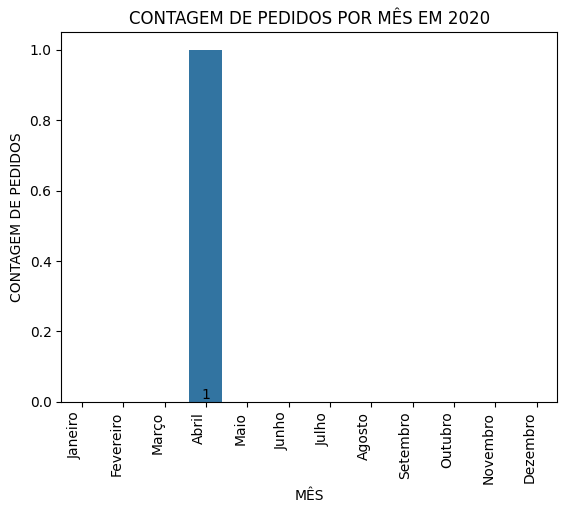

In [11]:
df = pd.DataFrame(orders_2020_count_sorted)

ax=sns.barplot(x='MÊS', y='CONTAGEM', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
for index, row in df.iterrows():
    ax.annotate(f'{row["CONTAGEM"]}', xy=(row["MÊS"], index), ha='center', va='bottom')

plt.xlabel('MÊS')
plt.ylabel('CONTAGEM DE PEDIDOS')
plt.title('CONTAGEM DE PEDIDOS POR MÊS EM 2020')

# Mostrar o gráfico
plt.show()

# ANO DE 2018

In [12]:
orders_df2 = orders_df.sort_values(by=["MÊS", "ANO"])

orders_2018 = orders_df2[orders_df2["ANO"] == 2018]


orders_2018_count = orders_2018.groupby(["ANO", "MÊS"]).size().reset_index(name="CONTAGEM")

meses_ordem = [
    "Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
    "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"
]

orders_2018_count["MÊS"] = pd.Categorical(
    orders_2018_count["MÊS"], 
    categories=meses_ordem, 
    ordered=True
)

orders_2018_count_sorted = orders_2018_count.sort_values(by="MÊS", ascending=True)

orders_2018_count_sorted.head(12)

,ANO,MÊS,CONTAGEM
3,2018,Janeiro,6516
2,2018,Fevereiro,6315
7,2018,Março,7441
0,2018,Abril,6515
6,2018,Maio,7441
5,2018,Junho,5956
4,2018,Julho,5820
1,2018,Agosto,7673
8,2018,Setembro,77


C:\Users\willi.WILL\AppData\Local\Temp\ipykernel_7880\2131333774.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


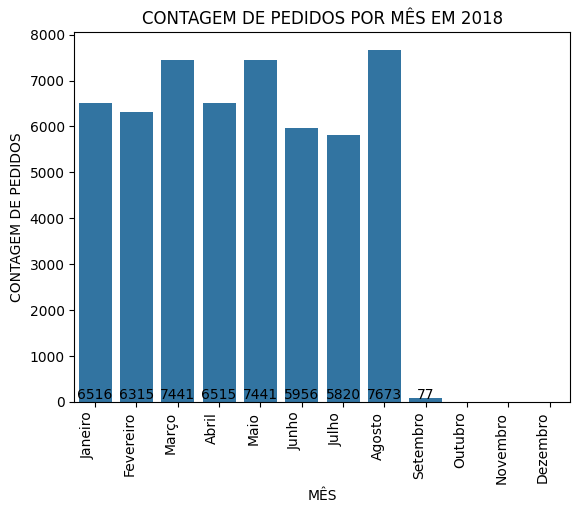

In [13]:
df = pd.DataFrame(orders_2018_count_sorted)

ax=sns.barplot(x='MÊS', y='CONTAGEM', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
for index, row in df.iterrows():
    ax.annotate(f'{row["CONTAGEM"]}', xy=(row["MÊS"], index), ha='center', va='bottom')

plt.xlabel('MÊS')
plt.ylabel('CONTAGEM DE PEDIDOS')
plt.title('CONTAGEM DE PEDIDOS POR MÊS EM 2018')

# Mostrar o gráfico
plt.show()

# ANO DE 2017

In [14]:
orders_df2 = orders_df.sort_values(by=["MÊS", "ANO"])

orders_2017 = orders_df2[orders_df2["ANO"] == 2017]


orders_2017_count = orders_2017.groupby(["ANO", "MÊS"]).size().reset_index(name="CONTAGEM")

meses_ordem = [
    "Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
    "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"
]

orders_2017_count["MÊS"] = pd.Categorical(
    orders_2017_count["MÊS"], 
    categories=meses_ordem, 
    ordered=True
)

orders_2017_count_sorted = orders_2017_count.sort_values(by="MÊS", ascending=True)

orders_2017_count_sorted.head(12)

,ANO,MÊS,CONTAGEM
4,2017,Janeiro,546
3,2017,Fevereiro,1581
8,2017,Março,2303
0,2017,Abril,2036
7,2017,Maio,3561
6,2017,Junho,3283
5,2017,Julho,3564
1,2017,Agosto,4300
11,2017,Setembro,4068
10,2017,Outubro,4395


C:\Users\willi.WILL\AppData\Local\Temp\ipykernel_7880\3080451780.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


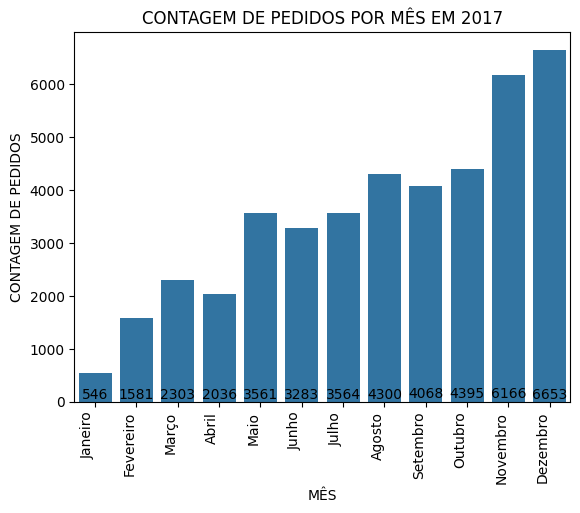

In [15]:
df = pd.DataFrame(orders_2017_count_sorted)

ax=sns.barplot(x='MÊS', y='CONTAGEM', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

for index, row in df.iterrows():
    ax.annotate(f'{row["CONTAGEM"]}', xy=(row["MÊS"], index), ha='center', va='bottom')
plt.xlabel('MÊS')
plt.ylabel('CONTAGEM DE PEDIDOS')
plt.title('CONTAGEM DE PEDIDOS POR MÊS EM 2017')

# Mostrar o gráfico
plt.show()

# ANO DE 2016

In [16]:
orders_df2 = orders_df.sort_values(by=["MÊS", "ANO"])

orders_2016 = orders_df2[orders_df2["ANO"] == 2016]


orders_2016_count = orders_2016.groupby(["ANO", "MÊS"]).size().reset_index(name="CONTAGEM")

meses_ordem = [
    "Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho",
    "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"
]

orders_2016_count["MÊS"] = pd.Categorical(
    orders_2016_count["MÊS"], 
    categories=meses_ordem, 
    ordered=True
)

orders_2016_count_sorted = orders_2016_count.sort_values(by="MÊS", ascending=True)

orders_2016_count_sorted.head(12)

,ANO,MÊS,CONTAGEM
2,2016,Setembro,1
1,2016,Outubro,265
0,2016,Dezembro,1


C:\Users\willi.WILL\AppData\Local\Temp\ipykernel_7880\128732021.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


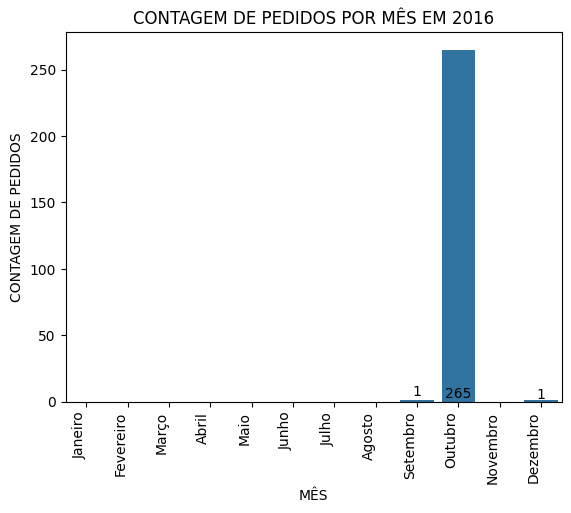

In [17]:
df = pd.DataFrame(orders_2016_count_sorted)

ax=sns.barplot(x='MÊS', y='CONTAGEM', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

for index, row in df.iterrows():
    ax.annotate(f'{row["CONTAGEM"]}', xy=(row["MÊS"], index), ha='center', va='bottom')

plt.xlabel('MÊS')
plt.ylabel('CONTAGEM DE PEDIDOS')
plt.title('CONTAGEM DE PEDIDOS POR MÊS EM 2016')

# Mostrar o gráfico
plt.show()